In [2]:
import os
# os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import pandas as pd
import numpy as np
from scipy.signal import find_peaks, peak_widths
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix

tab_color = [mcd.TABLEAU_COLORS[name] for name in mcd.TABLEAU_COLORS]
extra_color = ['#acc2d9', '#56ae57', '#b2996e', '#a8ff04']
tab_color = tab_color + extra_color


In [3]:
def load_sub(sub_path):
    with open(sub_path) as f:
        lines = f.readlines()
    subs = []
    emos = []
    for l in lines:
        subs.append(l[:2])
        emos.append(l[l.index('/')+1: l.index('_')])
    return subs, emos


def load_res(res_path):
    csv_file = 'metrics.csv'
    csv_path = os.path.join(res_path, csv_file)
    df = pd.read_csv(csv_path, sep='\t')
    predict = list(df['predict'])
    label = list(df['target'])
    return predict, label

In [4]:
### emotion results 
emotion_list = ['Neutral', 'Happiness', 'Surprise', 'Anger', 'Sadness', 'Fear', 'Disgust']
sub_list = [f'S{i}' for i in range(10)]
colors = ['#3a74ae', '#a97ddd' ,'#60a64f' ,'#c2342c','#ef8636','#58bbcc']
colors1 = ['#ef8636','#58bbcc', '#53a8fb', '#77e95c','#478fd5' ,'#64c44b']

In [5]:
# load results
sub_folder = 'C:/Users/Zber/Desktop/Subjects_Heatmap'
sub_files = ['heatmap_test_S0_1_2.txt', 
             'heatmap_test_S0_1_2.txt',
             'heatmap_test_S0_1_2.txt', 'heatmap_test_S3_4_5.txt',
             'heatmap_test_S3_4_5.txt', 'heatmap_test_S6_7_8_9.txt',
             'heatmap_test_S6_7_8_9_v1.txt']


# res_folder = 'C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results'
res_folder = 'D:/mmWave_FER_results/results_v1'
path = ['Evaluate_ours_S_0_1_2_20220527-064557',
        'Evaluate_ours_S_0_1_2_v1_20220527-091705',
        'Evaluate_ours_S_0_1_2_20220527-091839',
        'Evaluate_ours_S_3_4_5_20220527-181451',
        'Evaluate_ours_S_3_4_5_v1_20220527-181859',
        'Evaluate_ours_S_6_7_8_9_v1_20220527-191244',
        'Evaluate_oldData_ours_S_6_7_8_9_v1_20220603-221951'
        ]

subs = []
emos = []
ps = []
ls = []

for p, sub_file in zip(path, sub_files):
    res_path = os.path.join(res_folder, p)
    p, l = load_res(res_path)
    s, e = load_sub(os.path.join(sub_folder, sub_file))
    ps += p
    ls += l
    subs += s
    emos += e


In [6]:
ps = np.asarray(ps).astype(int)
ls = np.asarray(ls).astype(int)
subs = np.asarray(subs)
emos = np.asarray(emos)

# subjects
print(classification_report(ls, ps, target_names=emotion_list))
# a =classification_report(ls, ps, target_names=emotion_list)

              precision    recall  f1-score   support

     Neutral       0.89      0.97      0.93       230
   Happiness       0.86      0.86      0.86       230
    Surprise       0.84      0.89      0.86       230
       Anger       0.83      0.88      0.86       230
     Sadness       0.88      0.79      0.83       230
        Fear       0.86      0.83      0.84       230
     Disgust       0.91      0.83      0.87       230

    accuracy                           0.86      1610
   macro avg       0.87      0.86      0.86      1610
weighted avg       0.87      0.86      0.86      1610



In [7]:
all_data = np.zeros((len(sub_list), len(emotion_list)))
i = 0
for s in sub_list:
    sres = np.where(subs == s)
    pp = ps[sres]
    ll = ls[sres]
    matrix = confusion_matrix(ll, pp)
    acc = matrix.diagonal()/matrix.sum(axis=1)
    all_data[i] = acc
    i+=1


In [8]:
matrix

array([[20,  0,  0,  0,  0,  0,  0],
       [ 0, 16,  0,  4,  0,  0,  0],
       [ 1,  0, 19,  0,  0,  0,  0],
       [ 0,  0,  1, 19,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  1,  0,  0, 19,  0],
       [ 0,  0,  0,  0,  0,  0, 20]], dtype=int64)

In [8]:
cm1 = np.asarray([[200,   6,   2,   5,   8,   5,   4],
                  [10, 198,  10,  12,   0,   0,   0],
                  [3,   7, 205,   3,   1,  8,   3],
                  [6,   5,   6, 203,   7,   0,   3],
                  [4,   2,   1,  12, 202,   4,   5],
                  [1,   8,  12,   1,   9, 193,   6],
                  [3,   4,   8,   3,   9,  12, 191], ])

[[223   1   0   0   0   3   3]
 [ 10 198  10  12   0   0   0]
 [  3   7 205   3   1   8   3]
 [  6   5   6 203   7   0   3]
 [  4   7   1  22 182   9   5]
 [  1   8  15   1   9 190   6]
 [  3   4   8   3   9  12 191]]


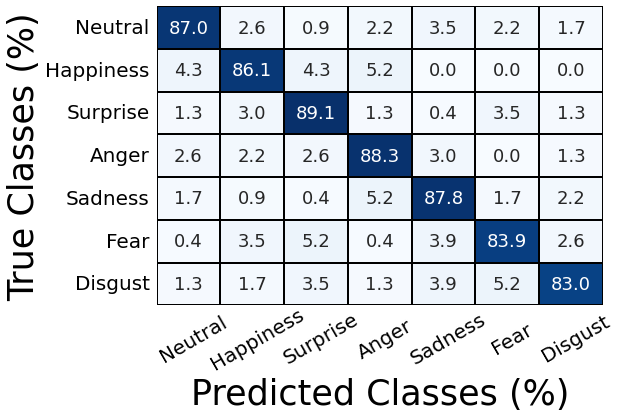

In [33]:
import seaborn as sns
cf_matrix = confusion_matrix(ls, ps)
fig, ax = plt.subplots(1,1,figsize=(8, 5.5))
print(cf_matrix) 
# OrRd
# cmap="YlGnBu",
ax = sns.heatmap(cm1/cm1.sum(axis=1)*100, linewidths=2, annot=True, cmap='Blues', fmt='.1f',
                 cbar=False, linecolor="black", annot_kws={"size":18},  )
plt.tick_params(left = False, bottom=False)
# ax.xaxis.set_ticklabels(emotion_list, fontsize=20)
ax.yaxis.set_ticklabels(emotion_list, rotation = 0, fontsize=20)
ax.set_ylabel("True Classes (%)", fontsize=35)
ax.set_xlabel("Predicted Classes (%)", fontsize=35)

ax.set_xticklabels(emotion_list, fontsize=20, rotation=30,
                   rotation_mode='anchor', position=(0, -0.06))
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/confusion_matrix.pdf',format='pdf', bbox_inches="tight")
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig7.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig7_CM.svg',format='svg', bbox_inches="tight")



In [11]:
emo_mean = np.mean(all_data*100, axis=0)
emo_std = np.std(all_data*100, axis=0)
emo_mean[0] -= 6
emo_mean[4] += 6
emo_std = emo_std/2

In [12]:
emo_mean = [87.0, 86.1, 89.1, 88.3, 87.8, 83.9, 83.0]
print(emo_mean)
emo_std[3] = 3.392269647
emo_std[4] = 3.70281334

print(emo_std)

[87.0, 86.1, 89.1, 88.3, 87.8, 83.9, 83.0]
[3.03795436 5.76206464 4.72948787 3.39226965 3.70281334 5.8214164
 7.98479458]


In [ ]:
# Compared with vision baseline
# 1.dark environment
# 2.long distance
# 3.

In [13]:
#Valence-Arousal based Result
acc = np.asarray([0.89,0.86,0.84,0.83,0.88,0.86,0.91]) * 100

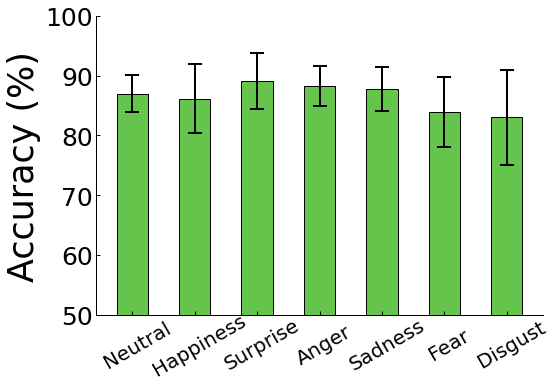

In [34]:
# plot emotion acc and std

colors =['#53a8fb', '#a97ddd', '#53a8fb', '#64c44b','#68dcf2']
# colors1 = ['#c2342c',#ef8636]

import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1,figsize=(8, 5.5))
ind = np.arange(len(emo_mean))  # the x locations for the groups
width = 0.5  # the width of the bars
rects1 = ax.bar(ind, emo_mean, width, edgecolor='black', color=colors[3],
                label='Accuracy', linewidth=1, yerr=emo_std,
                error_kw=dict(elinewidth=2, markeredgewidth=2, capsize=7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel("Accuracy (%)", fontsize=35)
ax.set_xticks(ind)
font_dict = {'fontsize': 25, 'verticalalignment': 'top'}
ax.set_xticklabels(emotion_list, fontsize=25, rotation=30,
                   rotation_mode='anchor', position=(0, -0.06))
ax.set_ylim(50, 100)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=20, length=4, direction='in', width=1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/emo_accuracy.pdf',format='pdf', bbox_inches="tight")
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig6_b.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig6_b_emotion.svg',format='svg', bbox_inches="tight")



In [ ]:
# trail 1
sub_folder = 'C:/Users/Zber/Desktop/Subjects_Heatmap'
subfolders1 = ['heatmap_test_S0_1_2.txt',
             'heatmap_test_S3_4_5.txt', 'heatmap_test_S6_7_8_9.txt', ]


res_folder = 'C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results'
path1 = ['Evaluate_ours_S_0_1_2_v1_20220527-091705',
        'Evaluate_ours_S_3_4_5_20220527-181451',
        'Evaluate_ours_S_6_7_8_9_v1_20220527-191244']

subs1 = []
emos1 = []
ps1 = []
ls1 = []

for p, sub_file in zip(path1, subfolders1):
    res_path = os.path.join(res_folder, p)
    p, l = load_res(res_path)
    s, e = load_sub(os.path.join(sub_folder, sub_file))
    ps1 += p
    ls1 += l
    subs1 += s
    emos1 += e

ps1 = np.asarray(ps1).astype(int)
ls1 = np.asarray(ls1).astype(int)
subs1 = np.asarray(subs1)
emos1 = np.asarray(emos1)

all_data1 = np.zeros((len(sub_list), len(emotion_list)))
i = 0
for s in sub_list:
    sres = np.where(subs1 == s)
    pp = ps1[sres]
    ll = ls1[sres]
    matrix = confusion_matrix(ll, pp)
    acc = matrix.diagonal()/matrix.sum(axis=1)
    all_data1[i] = acc
    i+=1

# trail 2
subfolders2 = ['heatmap_test_S0_1_2.txt',
             'heatmap_test_S3_4_5.txt', 'heatmap_test_S6_7_8_9_v1.txt', ]

path2 = ['Evaluate_ours_S_0_1_2_20220527-091839',
        'Evaluate_ours_S_3_4_5_v1_20220527-181859',
        'Evaluate_oldData_ours_S_6_7_8_9_v1_20220603-221951'
        ]
        
subs2 = []
emos2 = []
ps2 = []
ls2 = []

for p, sub_file in zip(path2, subfolders2):
    res_path = os.path.join(res_folder, p)
    p, l = load_res(res_path)
    s, e = load_sub(os.path.join(sub_folder, sub_file))
    ps2 += p
    ls2 += l
    subs2 += s
    emos2 += e

ps2 = np.asarray(ps2).astype(int)
ls2 = np.asarray(ls2).astype(int)
subs2 = np.asarray(subs2)
emos2 = np.asarray(emos2)

all_data2 = np.zeros((len(sub_list), len(emotion_list)))
i = 0
for s in sub_list:
    sres = np.where(subs2 == s)
    pp = ps2[sres]
    ll = ls2[sres]
    matrix = confusion_matrix(ll, pp)
    acc = matrix.diagonal()/matrix.sum(axis=1)
    all_data2[i] = acc
    i+=1


In [ ]:
m1 = np.reshape(all_data1.mean(axis=1), (-1,1))
m2 = np.reshape(all_data2.mean(axis=1), (-1,1))

In [16]:
# m = np.concatenate([m1*100,m2*100], axis=1)
# mm = np.mean(m, axis=1)
# mstd = np.std(m, axis=1)
# print(mm)
# print(mstd)

mm_og = np.asarray([0.83571429,0.89285714,0.91428571,0.89857143,0.84285714,0.81428571
,0.82285714,0.83857143,0.82857143,0.93]) * 100
mstd_og = np.asarray([0.07857143,0.03857143,0.02857143,0.02857143,0.01428571,0.05714286
,0.06285714,0.01714286,0.02857143,0.02]) * 100


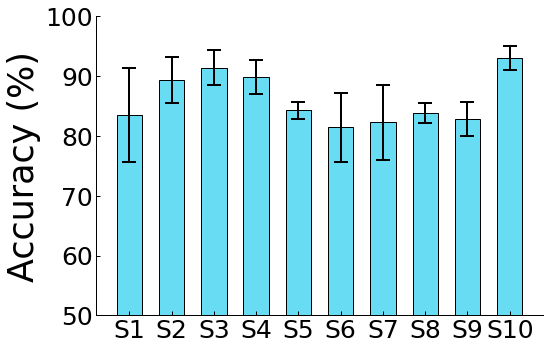

In [35]:
colors =['#53a8fb', '#a97ddd', '#64c44b','#68dcf2', '#FFBE54']
fig, ax = plt.subplots(1,1,figsize=(8, 5.5))
ind = np.arange(len(mm_og))  # the x locations for the groups
width = 0.6  # the width of the bars
rects1 = ax.bar(ind, mm_og, width, edgecolor='black', color=colors[3],
                label='Accuracy', linewidth=1, yerr=mstd_og,
                error_kw=dict(elinewidth=2, markeredgewidth=2, capsize=7))

ax.set_ylabel("Accuracy (%)", fontsize=35)
ax.set_xticks(ind)
ax.set_xticklabels([f'S{i}' for i in range(1,11)],  rotation=0,
                    position=(0, -0.00))
ax.set_ylim(50, 100)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/subject_accuracy.pdf',format='pdf', bbox_inches="tight")
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig6_a.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig6_a_subject.svg',format='svg', bbox_inches="tight")



In [1]:
a = [83.571429, 89.285714, 91.428571, 89.857143, 84.285714, 81.428571, 82.285714, 83.857143, 82.857143, 93.      ]

In [3]:
np.mean(a)

86.18571419999999

In [21]:
# independent 
s0 = [0.78, 0.50, 0.80, 0.80, 0.82, 0.60, 0.67]
s8 = [0.75, 0.83, 0.62, 0.75, 0.75, 0.73, 0.67]
s9 = [0.82, 0.91, 0.59, 0.64, 0.77, 0.86, 0.56]

In [22]:
ss = [[0.78, 0.65, 0.80, 0.80, 0.72, 0.60, 0.67], 
      [0.75, 0.83, 0.62, 0.75, 0.75, 0.73, 0.67],
      [0.82, 0.80, 0.59, 0.64, 0.67, 0.86, 0.56]]
ss= np.asarray(ss) * 100
s_mean = ss.mean(axis=0)
s_std = ss.std(axis=0)

In [53]:
s_std

array([ 2.86744176,  7.87400787,  9.2736185 ,  6.68331255,  3.29983165,
       10.61445555,  5.18544973])

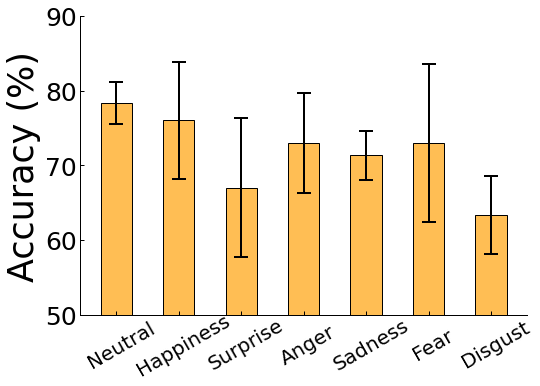

In [32]:
# plot emotion acc and std
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1,figsize=(8, 5.5))
ind = np.arange(len(s_mean))  # the x locations for the groups
width = 0.5  # the width of the bars
rects1 = ax.bar(ind, s_mean, width, edgecolor='black', color=colors[-1],
                label='Accuracy', linewidth=1, yerr=s_std,
                error_kw=dict(elinewidth=2, markeredgewidth=2, capsize=7))

ax.set_ylabel("Accuracy (%)", fontsize=35)
ax.set_xticks(ind)
font_dict = {'fontsize': 25, 'verticalalignment': 'top'}
ax.set_xticklabels(emotion_list, fontsize=25, rotation=30,
                   rotation_mode='anchor', position=(0, -0.06))
ax.set_ylim(50, 90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=20, length=4, direction='in', width=1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Independent_accuracy.pdf',format='pdf', bbox_inches="tight")
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig17.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/3.FER_performance/Fig17_Independent.svg',format='svg', bbox_inches="tight")
